In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from haversine import haversine
from math import sin, cos, sqrt, atan2, radians

In [2]:
data = pd.read_excel('대안1_위경도_랜덤.xlsx')
data

,Unnamed: 0,분류,사업장명,상세주소,위도,경도,주소,행정동,행정동 분기당매출,행정동 평균 생활인구
0,8,대형점포,뉴코아백화점,서울특별시 서초구 잠원로 37-6,37.508246,127.005711,서울특별시 서초구 잠원동,잠원동,5.230620e+11,5.871926e+05
1,133,버스 정류장,신반포역.세화여중고,서울특별시 서초구 신반포로 100,37.502943,126.994451,서울특별시 서초구 반포동,반포동,9.719000e+11,5.727164e+07
2,25,대형점포,코스트코코리아,서울특별시 서초구 양재대로 159,37.466119,127.043397,서울특별시 서초구 양재동,양재동,9.679810e+11,5.545405e+07
3,110,지하철역,교대(법원 검찰청),서울특별시 서초구 서초대로 지하294(서초동),37.495432,127.019170,서울특별시 서초구 서초동,서초동,4.237578e+12,3.512292e+06
4,26,대형점포,반포프라자,서울특별시 서초구 신반포로3길 8,37.503167,126.986102,서울특별시 서초구 반포동,반포동,9.719000e+11,5.727164e+07
...,...,...,...,...,...,...,...,...,...,...
70,104,병원,서초프라임요양병원,서울특별시 서초구 방배천로2길 22 (방배동),37.476709,126.983882,서울특별시 서초구 방배동,방배동,8.827651e+11,5.092560e+07
71,1,대형점포,터미널상가,서울특별시 서초구 신반포로 194,37.509920,127.018944,서울특별시 서초구 반포동,반포동,9.719000e+11,5.727164e+07
72,157,버스 정류장,우면주공아파트.양재1동주민센터,서울특별시 서초구 바우뫼로 27-2,37.470647,127.025938,서울특별시 서초구 우면동,양재동,9.679810e+11,5.545405e+07
73,150,버스 정류장,서초역.서울중앙지법등기국,서울특별시 서초구 반포대로 144,37.492915,127.007372,서울특별시 서초구 서초동,서초동,4.237578e+12,3.512292e+06


In [3]:
data = data.drop(['Unnamed: 0','분류','상세주소','주소','행정동','행정동 분기당매출','행정동 평균 생활인구'], axis = 1)
data

,사업장명,위도,경도
0,뉴코아백화점,37.508246,127.005711
1,신반포역.세화여중고,37.502943,126.994451
2,코스트코코리아,37.466119,127.043397
3,교대(법원 검찰청),37.495432,127.019170
4,반포프라자,37.503167,126.986102
...,...,...,...
70,서초프라임요양병원,37.476709,126.983882
71,터미널상가,37.509920,127.018944
72,우면주공아파트.양재1동주민센터,37.470647,127.025938
73,서초역.서울중앙지법등기국,37.492915,127.007372


In [4]:
# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids

#Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score

In [5]:
# scaling 함수
def df_scaler(data, cols, scale):
    df_cp = data.copy()
    
    if scale == "minmax":
        X = df_cp.loc[:,cols]
        MinMaxScalers = MinMaxScaler()
        MinMaxScalers.fit(X)
        df_MinMaxScaler = MinMaxScalers.transform(X)
        df_cp.loc[:, cols] = df_MinMaxScaler
    elif scale == "standard" :
        X = df_cp.loc[:,cols]
        StandardScalers = StandardScaler()
        StandardScalers.fit(X)
        df_StandardScalers = StandardScalers.transform(X)
        df_cp.loc[:, cols] = df_StandardScalers
    elif scale == "robust" :
        X = df_cp.loc[:,cols]
        RobustScalers = RobustScaler()
        RobustScalers.fit(X)
        df_RobustScaler = RobustScalers.transform(X)
        df_cp.loc[:, cols] = df_RobustScaler
    else:
        print("wrong")
    return df_cp

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

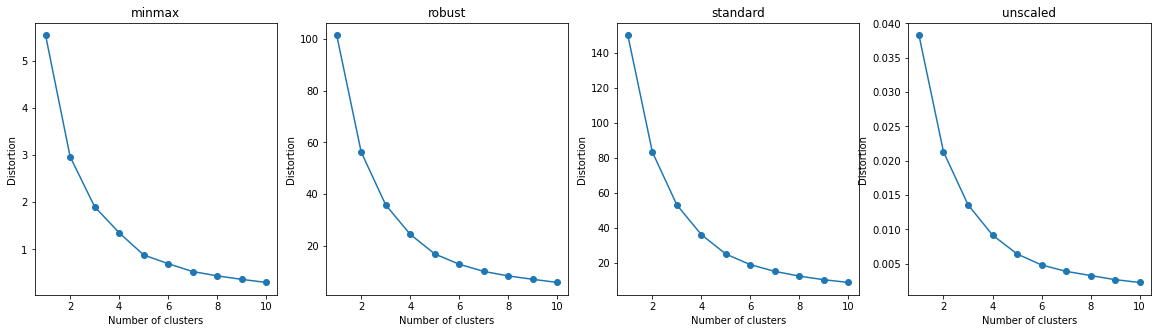

In [6]:
df = data.copy()
cols = ['위도','경도']
cols_ = ['위도','경도']
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m)


n = len(box)
fig, axes = plt.subplots(1,n,figsize = (5 * n, 5))
for i in range(len(scaler)):
    distortions = []
    for j in range(1, 11):
        km = KMeans(n_clusters=j)
        km.fit(box[scaler[i]].loc[:,cols])
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음
    
    axes[i].plot(range(1, 11), distortions, marker='o')
    axes[i].set_title(scaler[i])
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Distortion')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)


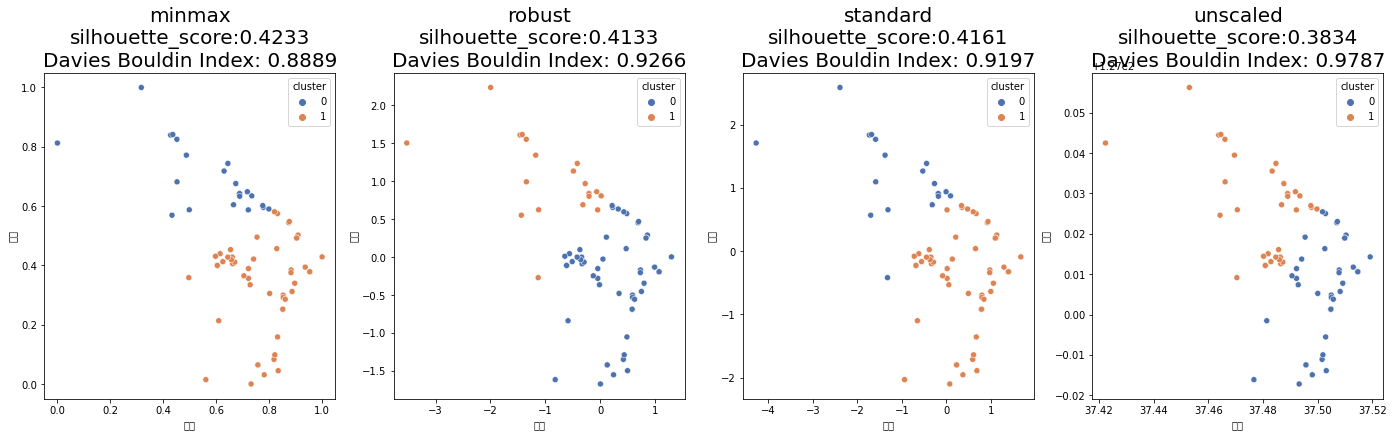

In [7]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))
for i in range(len(scaler)):
    
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(box[scaler[i]].loc[:,cols])
    box[scaler[i]]['cluster'] = kmeans.labels_
    
    s = sns.scatterplot(x = cols[0], y = cols[1], data = box[scaler[i]], marker='o', hue = 'cluster', palette = 'deep', ax = axes[i])
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], kmeans.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],kmeans.labels_),4)}", fontsize = 20)

    #s.set_xlabel(cols[0])
    #s.set_ylabel(cols[1])
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


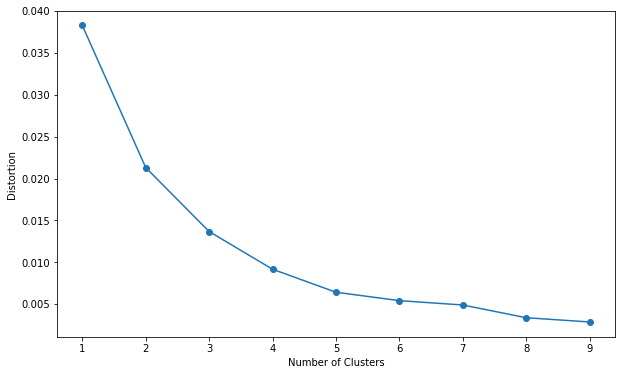

In [8]:
data_elbow = data.drop(['사업장명'], axis = 1)

distortions = []
for i in range(1,10):
    km = KMeans(
    n_clusters= i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    km.fit(data_elbow)
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [9]:
# k-means clustering

data1 = data_elbow.copy()
model1 = KMeans(n_clusters=2, random_state=2021009, algorithm='auto')
model1.fit(data1)

KMeans(n_clusters=2, random_state=2021009)

In [10]:
# 각 군집(cluster) 표시
pred1 = model1.predict(data1)
pred1

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1])

In [11]:
# 원형 데이터에 군집 예측치 추가
data['k_means_cluster'] = pred1
data

,사업장명,위도,경도,k_means_cluster
0,뉴코아백화점,37.508246,127.005711,0
1,신반포역.세화여중고,37.502943,126.994451,0
2,코스트코코리아,37.466119,127.043397,1
3,교대(법원 검찰청),37.495432,127.019170,0
4,반포프라자,37.503167,126.986102,0
...,...,...,...,...
70,서초프라임요양병원,37.476709,126.983882,0
71,터미널상가,37.509920,127.018944,0
72,우면주공아파트.양재1동주민센터,37.470647,127.025938,1
73,서초역.서울중앙지법등기국,37.492915,127.007372,0


In [12]:
# 군집별 통계(평균)
cluster_k1 = data.groupby('k_means_cluster')
cluster_k1.mean()

,위도,경도
k_means_cluster,,
0,37.502320,127.006691
1,37.479608,127.026606


In [13]:
# 군집별 통계(중앙값)
cluster_k1 = data.groupby('k_means_cluster')
cluster_k1.median()

,위도,경도
k_means_cluster,,
0,37.503167,127.008959
1,37.484750,127.027079


In [14]:
# pd.set_option("display.max_rows", None)

analysis1 = data.copy()
analysis1 = analysis1.sort_values(by='k_means_cluster')
analysis1

,사업장명,위도,경도,k_means_cluster
0,뉴코아백화점,37.508246,127.005711,0
30,고도일병원,37.507009,127.022747,0
33,메가박스중앙(주) 센트럴 더부티크,37.505006,127.004235,0
34,서초,37.492288,127.008959,0
73,서초역.서울중앙지법등기국,37.492915,127.007372,0
...,...,...,...,...
14,이익훈어학2관학원,37.497535,127.026977,1
48,우면산도시자연공원,37.470484,127.009132,1
49,더케이호텔서울,37.466169,127.032859,1
53,피에스에이어학학원,37.489043,127.029948,1


In [15]:
is_0 = data['k_means_cluster'] == 0
is_1 = data['k_means_cluster'] == 1

In [16]:
print(len(data[is_0]))
data[is_0]

41


,사업장명,위도,경도,k_means_cluster
0,뉴코아백화점,37.508246,127.005711,0
1,신반포역.세화여중고,37.502943,126.994451,0
3,교대(법원 검찰청),37.495432,127.019170,0
4,반포프라자,37.503167,126.986102,0
5,반포심산아트홀,37.502653,127.016319,0
6,뉴코아아울렛,37.509209,127.007759,0
8,신논현역.구교보타워사거리,37.502888,127.025002,0
11,티롤 관광호텔,37.514700,127.010592,0
13,학교법인가톨릭학원가톨릭대학교서울성모병원,37.500064,127.005228,0
15,슈필렌 아트홀,37.504852,127.001323,0


In [17]:
print(len(data[is_1]))
data[is_1]

34


,사업장명,위도,경도,k_means_cluster
2,코스트코코리아,37.466119,127.043397,1
7,무지개종합상가,37.489043,127.029948,1
9,강남역.9번출구,37.497727,127.026548,1
10,뱅뱅사거리,37.487667,127.032432,1
12,신라스테이 서초,37.489043,127.029948,1
14,이익훈어학2관학원,37.497535,127.026977,1
16,나인스 호텔,37.486535,127.012575,1
18,브리티쉬인터네셔널킨더가튼어학학원,37.481921,127.015062,1
19,한국예술종합학교 이강숙홀,37.480876,127.012153,1
20,청계산도시자연공원,37.422435,127.042473,1


In [18]:
# cluster = 0
cluster0 = data.copy()
cluster0 = cluster0[is_0]
cluster0 = cluster0[['사업장명','위도','경도']]
cluster0.reset_index(drop = True,inplace = True)
cluster0

,사업장명,위도,경도
0,뉴코아백화점,37.508246,127.005711
1,신반포역.세화여중고,37.502943,126.994451
2,교대(법원 검찰청),37.495432,127.019170
3,반포프라자,37.503167,126.986102
4,반포심산아트홀,37.502653,127.016319
5,뉴코아아울렛,37.509209,127.007759
6,신논현역.구교보타워사거리,37.502888,127.025002
7,티롤 관광호텔,37.514700,127.010592
8,학교법인가톨릭학원가톨릭대학교서울성모병원,37.500064,127.005228
9,슈필렌 아트홀,37.504852,127.001323


In [19]:
# cluster = 1
cluster1 = data.copy()
cluster1 = cluster1[is_1]
cluster1 = cluster1[['사업장명','위도','경도']]
cluster1.reset_index(drop = True,inplace = True)
cluster1

,사업장명,위도,경도
0,코스트코코리아,37.466119,127.043397
1,무지개종합상가,37.489043,127.029948
2,강남역.9번출구,37.497727,127.026548
3,뱅뱅사거리,37.487667,127.032432
4,신라스테이 서초,37.489043,127.029948
5,이익훈어학2관학원,37.497535,127.026977
6,나인스 호텔,37.486535,127.012575
7,브리티쉬인터네셔널킨더가튼어학학원,37.481921,127.015062
8,한국예술종합학교 이강숙홀,37.480876,127.012153
9,청계산도시자연공원,37.422435,127.042473


In [20]:
washing_herb = cluster_k1.mean()
washing_herb.insert(0,"사업장명",['세척허브1','세척허브2'],True)
washing_herb

,사업장명,위도,경도
k_means_cluster,,,
0,세척허브1,37.502320,127.006691
1,세척허브2,37.479608,127.026606


In [21]:
# 전체 합치기

cluster0 = data.copy()
cluster0 = cluster0[is_0]
cluster0 = cluster0[['사업장명','위도','경도']]
cluster0.reset_index(drop = True,inplace = True)

cluster1 = data.copy()
cluster1 = cluster1[is_1]
cluster1 = cluster1[['사업장명','위도','경도']]
cluster1.reset_index(drop = True,inplace = True)

lat = data['위도'].mean()
long = data['경도'].mean()
map = folium.Map([lat,long],zoom_start = 12)

# 클러스터 0
coords0 = []

for i in range(len(cluster0)):
  x = cluster0['위도'][i]
  y = cluster0['경도'][i]
  coords0.append([x,y])

for j in range(len(coords0)):
  folium.Marker(location = coords0[j], icon = folium.Icon(color='red',icon = 'train',prefix='fa'), popup = cluster0['사업장명'][j],).add_to(map)

# 클러스터 1
coords1 = []

for i in range(len(cluster1)):
  x = cluster1['위도'][i]
  y = cluster1['경도'][i]
  coords1.append([x,y])

for j in range(len(coords1)):
  folium.Marker(location = coords1[j], icon = folium.Icon(color='blue',icon = 'train',prefix='fa'), popup = cluster1['사업장명'][j],).add_to(map)

# 세척 허브
coords = []

for i in range(len(washing_herb)):
  x = washing_herb['위도'][i]
  y = washing_herb['경도'][i]
  coords.append([x,y])

for j in range(len(coords)):
  folium.Marker(location = coords[j], icon = folium.Icon(color='purple',icon_color='white',icon='glyphicon glyphicon-thumbs-up', prefix='glyphicon'),popup = washing_herb['사업장명'][j],).add_to(map)

map.save('대안1_세척허브.html')
map